In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
penguins = sns.load_dataset("penguins")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [4]:
penguins.shape

(344, 7)

In [5]:
penguins_sub=penguins[penguins['species']!='Chinstrap']
penguins_final=penguins.dropna()
penguins_final.reset_index(inplace=True,drop=True)
#penguins_final.shape

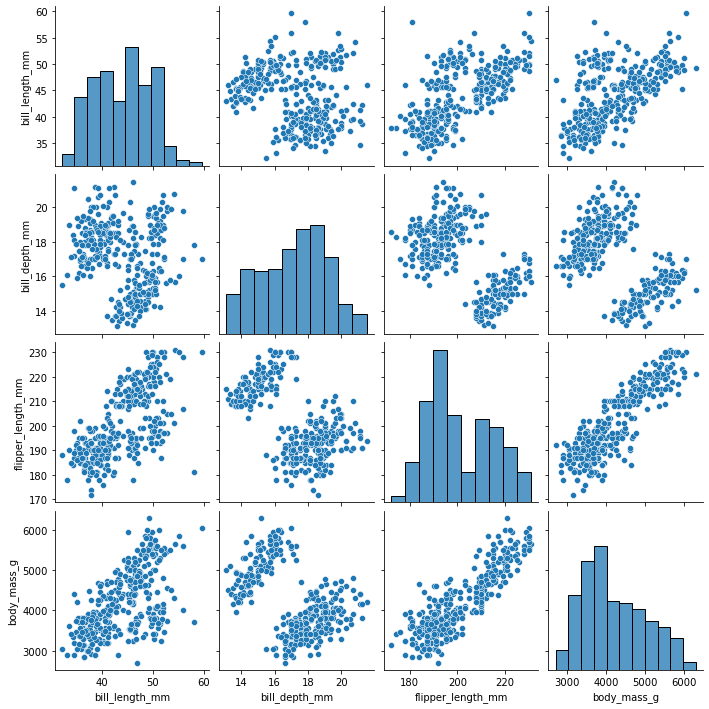

In [6]:
#Exploratory data analysis
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

In [7]:
penguins_final.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [8]:
##*********** Model Building********
#I will focus on the relationship between bill length (mm) and body mass (g).
ols_data=penguins_final[['bill_length_mm','body_mass_g']]
ols_data

,bill_length_mm,body_mass_g
0,39.1,3750.0
1,39.5,3800.0
2,40.3,3250.0
3,36.7,3450.0
4,39.3,3650.0
...,...,...
328,47.2,4925.0
329,46.8,4850.0
330,50.4,5750.0
331,45.2,5200.0


In [9]:
#Next,the linear regression formula, and save it as a string.
#Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.
ols_formula="body_mass_g ~ bill_length_mm"
ols_formula
# The names of the x and y variables have to exactly match the column names in the dataframe.

'body_mass_g ~ bill_length_mm'

In [10]:
from statsmodels.formula.api import ols 

In [11]:
# Build OLS, fit model to data
OLS= ols(formula=ols_formula,data=ols_data)
model=OLS.fit()
model

In [12]:
#Lastly, you can call the summary() function on the model object to get the coefficients and more statistics about the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           1.54e-32
Time:                        16:58:56   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

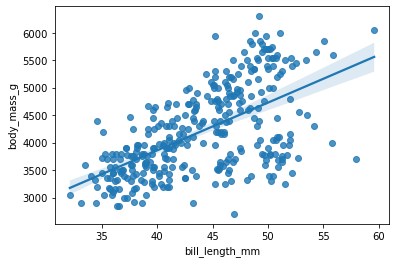

In [13]:
sns.regplot(x='bill_length_mm',y='body_mass_g',data=ols_data)

In [16]:
X=ols_data['bill_length_mm']
# Get predictions from model
fitted_value=model.predict(X)
fitted_value

0      3782.402961
1      3817.119665
2      3886.553073
3      3574.102738
4      3799.761313
          ...     
328    4485.416214
329    4450.699510
330    4763.149845
331    4311.832695
332    4719.753965
Length: 333, dtype: float64

In [24]:
# Calculate residuals
residual=model.resid
residual

0      -32.402961
1      -17.119665
2     -636.553073
3     -124.102738
4     -149.761313
          ...    
328    439.583786
329    399.300490
330    986.850155
331    888.167305
332    680.246035
Length: 333, dtype: float64

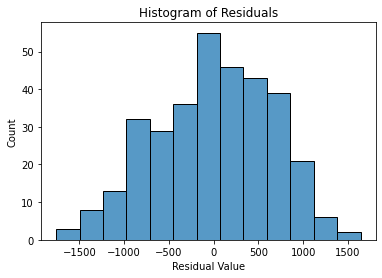

In [25]:
##*****Check the normality assumption******
#To check the normality assumption, you can create a histogram of the residual
fig=sns.histplot(residual)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

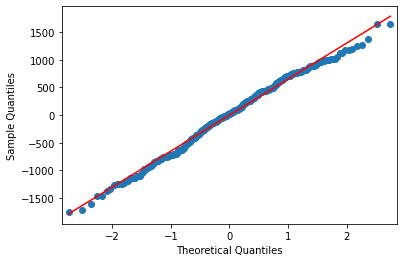

In [27]:
#the normality function is to create a quantile-quantile or Q-Q plot.
sm.qqplot(residual,line='s')
plt.show()

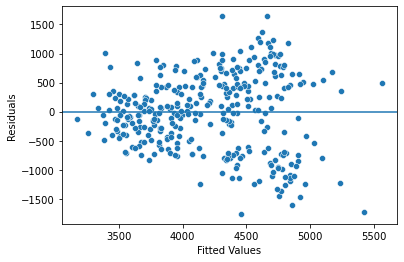

In [30]:
###*********Check the homoscedasticity assumption**********
fig=sns.scatterplot(x=fitted_value,y=residual)
# Add reference line at residuals = 0

fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()